## Interface to different programs

PPQM has interfaces to different QM programs, making it easy to calculate properties with different programs on the same RDKit molobj



In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import logging
import sys

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [5]:
try:
    import ppqm
except ModuleNotFoundError:
    import pathlib

    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import ppqm

## Set logging level

In [6]:
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger("ppqm").setLevel(logging.INFO)

logging.getLogger("xtb").setLevel(logging.DEBUG)
logging.getLogger("gamess").setLevel(logging.DEBUG)
logging.getLogger("mopac").setLevel(logging.DEBUG)

show_progress = False

## Define a molecule you like

In [7]:
smiles = "NCC(=O)N[C@H]1CO[C@@H](c2ccc([N+](=O)[O-])cc2)OC1"  # CHEMBL260511
molobj = Chem.MolFromSmiles(smiles)

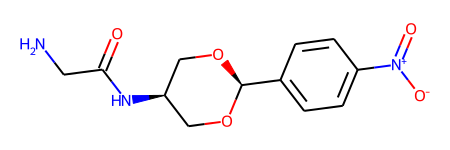

In [8]:
molobj

## Get some 3D conformers (RDKit)

In [9]:
molobj = ppqm.tasks.generate_conformers(molobj)

In [10]:
molobj.GetNumConformers()

13

In [20]:
# Define different programs

calculator_options = {"scr": "_tmp_directory_", "n_cores": 2, "show_progress": show_progress}

mopac = ppqm.MopacCalculator(
    cmd="mopac",
    **calculator_options
)
gamess = ppqm.GamessCalculator(
    cmd="rungms",
    gamess_userscr="~/scratch/gamess/restart",
    gamess_scr="~/scratch/gamess/restart",
    **calculator_options
)
xtb = ppqm.XtbCalculator(
    cmd="xtb",
    **calculator_options
)

## Different programs, requires different settings

In [21]:
mopac

MopacCalc(scr=_tmp_directory_, cmd=mopac)

In [22]:
xtb

XtbCalc(cmd=xtb,scr=_tmp_directory_,n_cores=2)

In [23]:
gamess

GamessCalc(cmd=rungms,scr=_tmp_directory_)

## Different input and different output

In [ ]:
%%time
mopac_options = {
    "pm3": None,
    "precise": None,
    "mullik": None,
    "eps": 78.4,
}

results_mopac = mopac.calculate(molobj, mopac_options)

In [ ]:
%%time
xtb_options = {
    "gfn": 1,
    "alpb": "water",
    "opt": None,
}

results_xtb = xtb.calculate(molobj, xtb_options)

In [24]:
%%time
gamess_options = {
    "basis": {"gbasis": "pm3"},
    "contrl": {"runtyp": "optimize"},
    "statpt": {"opttol": 0.0005, "nstep": 300, "projct": False},
    "system": {"mwords": 125},
    "pcm": {
        "solvnt": "water",
        "mxts": 15000,
        "icav": 1,
        "idisp": 1,
    },
    "tescav": {"mthall": 4, "ntsall": 60},
}

results_gamess = gamess.calculate(molobj, gamess_options)

DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:_tmp_directory_ rungms _tmp_gamess.inp
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:parseing optimize SQM solvation=True
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:_tmp_directory_ rungms _tmp_gamess.inp
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:parseing optimize SQM solvation=True
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:_tmp_directory_ rungms _tmp_gamess.inp
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:parseing optimize SQM solvation=True
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:_tmp_directory_ rungms _tmp_gamess.inp
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:parseing optimize SQM solvation=True
DEBUG:gamess:removing ~/scratch/gamess/restart _tmp_gamess.inp
DEBUG:gamess:_tmp_directo

## Results

In [ ]:
df_gamess = pd.DataFrame(results_gamess)

In [ ]:
df_mopac = pd.DataFrame(results_mopac)

In [ ]:
df_xtb = pd.DataFrame(results_xtb)

In [ ]:
df_mopac

In [ ]:
df_xtb.head()

In [ ]:
df_gamess

## TODO

- properties
- timings
- n_steps
- rmsd

- conformer ranking

